# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [44]:
#импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [7]:
# откройте данные: ваш код здесь
data = pd.read_csv('spam_or_not_spam.csv')
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [6]:
# рассчитайте частоты для классов : ваш код здесь
classes=data['label'].value_counts()
classes

0    2500
1     500
Name: label, dtype: int64

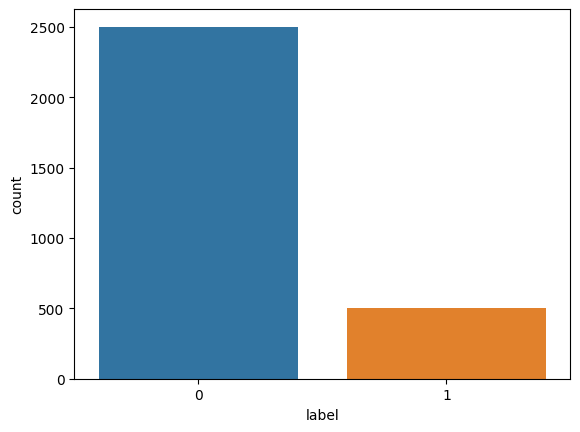

In [53]:
#визуализируем данные
sns.countplot(data=data, x='label');

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [73]:
#ваш код здесь
df = data.copy()
df = df.replace(r"^\s*$", np.NaN, regex=True).dropna()
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2997 non-null   object
 1   label   2997 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.2+ KB


None

Переводим данные в векторный вид:

In [21]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [22]:
#ваш код здесь
print(f'Количество признаков в наборе данных: {X.shape[1]}')

Количество признаков в наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [25]:
#ваш код здесь
y = df["label"]

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [27]:
#ваш код здесь
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [29]:
#ваш код здесь
round(y_test.mean(), 3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [49]:
#ваш код здесь
from sklearn.naive_bayes import MultinomialNB, ComplementNB
#alpha = 0.01
clf = ComplementNB(alpha = 0.01)
clf.fit(X_train, y_train)

ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [50]:
#ваш код здесь
# делаем предсказания
y_test_pred = clf.predict(X_test)

# рассчитываем метрики
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_test_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_test_pred):.3f}")
print(f"F1-мера: {f1_score(y_test, y_test_pred):.3f}")

Accuracy: 0.988
Precision: 1.000
Recall: 0.927
F1-мера: 0.962


Нарисуйте ROC-кривую:

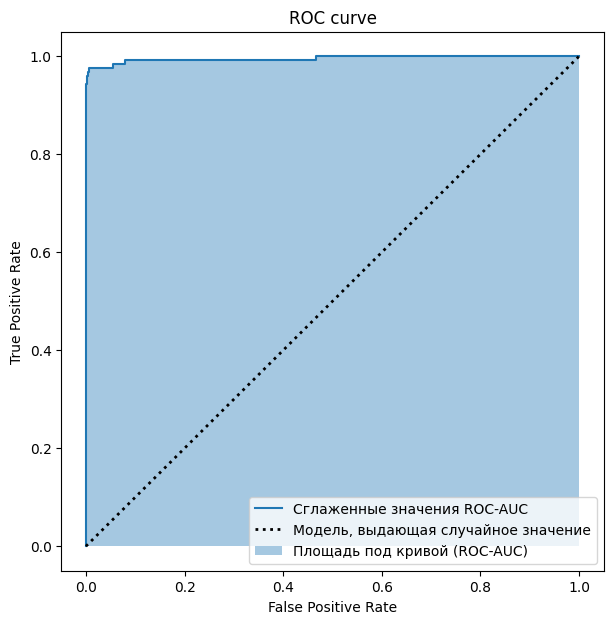

In [88]:
#ваш код здесь
pred_proba_clf = clf.predict_proba(X_test)
pred_proba = pred_proba_clf[:, 1]
false_positive_rates, true_positive_rates, threshold = roc_curve(y_test, pred_proba)

# создаём график
plt.figure(figsize=(7, 7))

# рисуем кривую
plt.plot(false_positive_rates, true_positive_rates, 
         label='Сглаженные значения ROC-AUC')

# кривая, соответствующая случайному угадыванию
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.fill_between(false_positive_rates, true_positive_rates, step="pre", 
                 alpha=0.4, label='Площадь под кривой (ROC-AUC)')
plt.legend()
plt.show()


## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [72]:
#ваш код здесь
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 0.5, 1]}
            
grid_search_clf = GridSearchCV(
    estimator=ComplementNB(), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_clf.fit(X_train, y_train) 
print("Наилучшие значения параметров: {}".format(grid_search_clf.best_params_))

#рассчитаем метрики
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_clf.score(X_test, y_test)))

y_train_pred = grid_search_clf.predict(X_train)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print('Recall на обучающем наборе: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Precision на обучающем наборе: {:.2f}'.format(metrics.precision_score(y_train, y_train_pred)))


y_test_pred = grid_search_clf.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('Precision на тестовом наборе: {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))


CPU times: total: 172 ms
Wall time: 3.87 s
Наилучшие значения параметров: {'alpha': 0.5}
accuracy на тестовом наборе: 0.99
f1_score на обучающем наборе: 1.00
Recall на обучающем наборе: 0.99
Precision на обучающем наборе: 1.00
f1_score на тестовом наборе: 0.98
Recall на тестовом наборе: 0.98
Precision на тестовом наборе: 0.99
